In [2]:
from src.core.dryvrmain import verify
%matplotlib notebook


In [3]:
from scipy.integrate import odeint
import numpy as np 
import time

def thermo_dynamic(y,t,rate):
    dydt = rate*y
    return dydt

def TC_Simulate(Mode,initialCondition,time_bound):
    time_step = 0.05;
    time.sleep(0.1)
    time_bound = float(time_bound)
    initial = [float(tmp)  for tmp in initialCondition]
    number_points = int(np.ceil(time_bound/time_step))
    t = [i*time_step for i in range(0,number_points)]
    if t[-1] != time_step:
        t.append(time_bound)

    y_initial = initial[0]

    if Mode == 'On':
        rate = 0.1
    elif Mode == 'Off':
        rate = -0.1
    else:
        print('Wrong Mode name!')
    sol = odeint(thermo_dynamic,y_initial,t,args=(rate,),hmax = time_step)

    # Construct the final output
    trace = []
    for j in range(len(t)):
        #print t[j], current_psi
        tmp = []
        tmp.append(t[j])
        tmp.append(sol[j,0])
        trace.append(tmp)
    return trace

In [4]:
args = {
    "vertex" : ["On","Off","On"],
    "edge":[[0,1],[1,2]],
    "variables":["temp"],
    "guards":["And(t>1.0,t<=1.1)","And(t>1.0,t<=1.1)"],
    "initialSet":[[75.0],[76.0]],
    "unsafeSet":"@On:temp>91@Off:temp>91",
    "timeHorizon":3.5,
}

<IPython.core.display.Javascript object>


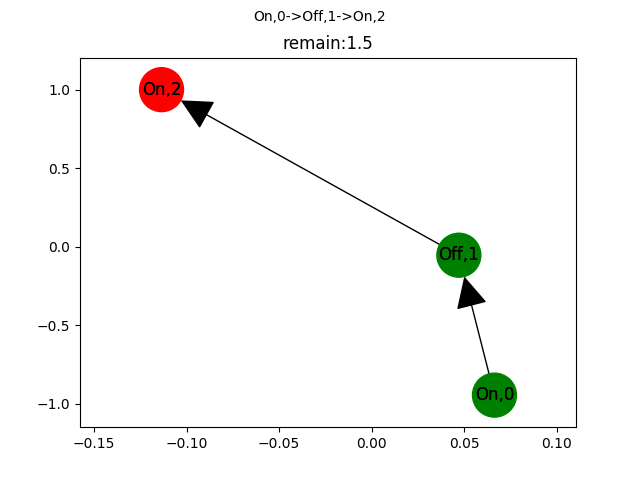

transit time 1.05 remain time 2.45
transit time 1.0 remain time 1.45
transit time 1.45 remain time 0.0
Verification Begin
Mode: 0
stack size: 1
remainTime: 3.5

Lower Bound: [75.0]
Upper Bound: [76.0]
Delta: [0.5]

current mode label: On
=======real simu trace num 10
Off 1.0 [[82.88456687011167], [85.2623822870208]] And(t>1.0,t<=1.1)
Mode 0 check bloated tube safe
Child exist in cur mode inital 1 is curModeStack Now
Mode: 1
stack size: 1
remainTime: 2.5

Lower Bound: [82.88456687011167]
Upper Bound: [85.2623822870208]
Delta: [1.1889077084545647]

current mode label: Off
=======real simu trace num 10
On 1.0 [[73.88049588385638], [77.14415871999768]] And(t>1.0,t<=1.1)
Mode 1 check bloated tube safe
Child exist in cur mode inital 2 is curModeStack Now
Mode: 2
stack size: 1
remainTime: 1.5

Lower Bound: [73.88049588385638]
Upper Bound: [77.14415871999768]
Delta: [1.6318314180706466]

current mode label: On
=======real simu trace num 10
Mode 2 check bloated tube safe
No child exist in curre

<src.core.reachtube.ReachTube instance at 0x113d86cb0>

In [5]:
verify(args, TC_Simulate)

<IPython.core.display.Javascript object>


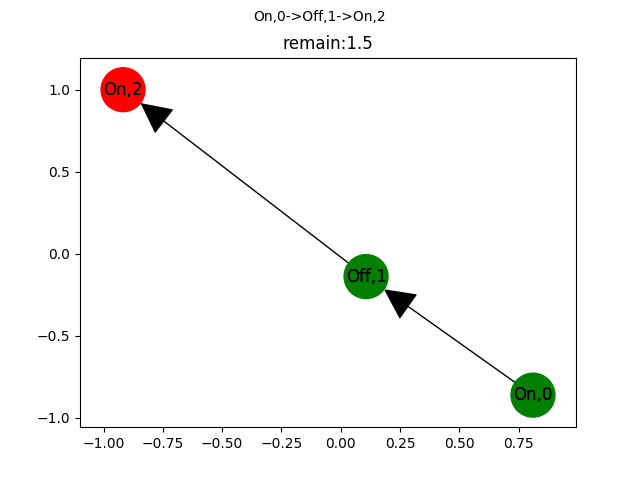

transit time 1.05 remain time 2.45
transit time 1.1 remain time 1.35
transit time 1.35 remain time 0.0
transit time 1.1 remain time 2.4
transit time 1.0 remain time 1.4
transit time 1.4 remain time 0.0
Verification Begin
Mode: 0
stack size: 1
remainTime: 3.5

Lower Bound: [75.0]
Upper Bound: [76.0]
Delta: [0.5]

current mode label: On
=======real simu trace num 10
Off 1.0 [[82.88456681973442], [85.26238234270197]] And(t>1.0,t<=1.1)
Mode 0 check bloated tube safe
Child exist in cur mode inital 1 is curModeStack Now
Mode: 1
stack size: 1
remainTime: 2.5

Lower Bound: [82.88456681973442]
Upper Bound: [85.26238234270197]
Delta: [1.188907761483776]

current mode label: Off
=======real simu trace num 10
On 1.0 [[73.88049574646274], [77.14415885629823]] And(t>1.0,t<=1.1)
Mode 1 check bloated tube safe
Child exist in cur mode inital 2 is curModeStack Now
Mode: 2
stack size: 1
remainTime: 1.5

Lower Bound: [73.88049574646274]
Upper Bound: [77.14415885629823]
Delta: [1.6318315549177456]

current

<src.core.reachtube.ReachTube instance at 0x113be9bd8>

In [6]:
config = {
    "SIMUTESTNUM":2
}
verify(args, TC_Simulate, paramConfig=config)